# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **economic activity or measures** (see below) for the region of **Chalgrove, Oxfordshire, United Kingdom**, or **United Kingdom** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Chalgrove, Oxfordshire, United Kingdom** to Ann Arbor, USA. In that case at least one source file must be about **Chalgrove, Oxfordshire, United Kingdom**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Chalgrove, Oxfordshire, United Kingdom** and **economic activity or measures**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **economic activity or measures**?  For this category you might look at the inputs or outputs to the given economy, or major changes in the economy compared to other regions.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

In [116]:
%matplotlib notebook

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import difflib
import re
import seaborn as sns

Import Local Authority to NUTS key // Source: http://ec.europa.eu/eurostat/web/nuts/local-administrative-units

In [52]:
key = pd.read_excel('key.xlsx',sheetname='UK', usecols=['NUTS3_13','LAU1_NAT_CODE_NEW'])
key = key.drop_duplicates()
key.columns = ['NUTS3','Area Code']
key = key.set_index('Area Code')

   Area Code for South Oxfordshire (Contains Chargrove)

In [67]:
ac = 'E07000179'

Import Gross Value Added // Source: https://www.ons.gov.uk/economy/grossvalueaddedgva/datasets/regionalgrossvalueaddedincomeapproach

In [103]:
gva = pd.read_excel('gva.xls',sheetname='Table 1', skiprows=1)
gva = gva[gva['NUTS level'].str.contains("NUTS3") == True]
gva = gva.set_index('NUTS code')
gva = key.merge(gva, left_on='NUTS3', right_index=True, how='left')
gva.drop(gva.columns[[0,1,2,3,4,5,6,7,8,9,10,11,21]], axis=1, inplace=True)
gva = gva[gva.index.str.contains(ac) == True]
gva = gva.transpose()
gva.columns = ['Gross Value Added']
bs = gva.iloc[0]['Gross Value Added']
gva['GVA % Change'] = ((gva['Gross Value Added'] - bs)/bs) * 100
x = [2006,2007,2008,2009,2010,2011,2012,2013,2014]
gva = gva.set_index([x],drop=True)
gva.head()

,Gross Value Added,GVA % Change
2006,15328.0,0.000000
2007,16138.0,5.284447
2008,16710.0,9.016180
2009,16627.0,8.474687
2010,17150.0,11.886743


Import UK Health Data // Source: http://www.phoutcomes.info/public-health-outcomes-framework#page/9/gid/1000049/pat/6/par/E12000004/ati/101/are/E06000015/nn/nn-1-E06000015

In [20]:
healthd = pd.read_excel('health.xlsx',sheetname='District & UA')
healthi = pd.read_excel('health.xlsx',sheetname='Indicator Metadata')

Selected Indicator

In [85]:
Id = '1.01ii'

ind = healthi[healthi['Indicator'].str.contains('{} '.format(Id)) == True]
nm = ind.iloc[0]['Indicator']
unit = ind.iloc[0]['Unit']

#Print out information about selected indicator.
ind

,Indicator,Definition,Value type,Unit,Indicator number,Data quality,Rationale,Policy,Data source,Indicator source,...,Standard population/values,Frequency,Confidence interval details,Disclosure control,Rounding,Caveats,Notes,Copyright,Data re-use,Links
1,1.01ii - Children in low income families (unde...,Percentage of children in low income families ...,Proportion,%,1.01ii,NaN,Child poverty is an important issue for public...,NaN,HM Revenue and Customs (Personal Tax Credits: ...,HM Revenue and Customs (Personal Tax Credits: ...,...,NaN,Annual (October),NaN,Numerator and denominator data have been round...,Numerators and denominators have been rounded.,For National Statistics data on child poverty ...,Denominator values are taken from the HM Reven...,HM Revenue and Customs,NaN,'A New Approach to Child Poverty: Tackling the...


In [100]:
# Select indicator from main dataset
data = healthd[healthd['Indicator'].str.contains('{} '.format(Id)) == True]
data = data[[1,4,6]]

# Get list of time periods
xx = data[[0]]
xx = xx.drop_duplicates()
xl = xx['Time Period'].tolist()

# Loop to create column for each year
for x in range(len(xl)):
    inputs = data[data['Time Period'].str.contains(xl[x]) == True]
    inputs = inputs.drop('Time Period', 1)
    
    # Average male and female values
    inputs = inputs.groupby(inputs['Area Code']).mean()
    inputs.columns = [xl[x]]
    if x == 0:
        datar = inputs
    else:
        datar = datar.merge(inputs, left_index=True, right_index=True, how='left')

# Select data for South Oxfordshire
datar = datar[datar.index.str.contains(ac) == True]
datar = datar.transpose()
datar.columns = ['Children LIF']
bl = datar.iloc[0]['Children LIF']
datar['Child LIF % Change'] = ((datar['Children LIF'] - bl)/bl) * -100
datar = datar.set_index([x],drop=True)
datar

,Children LIF,Child LIF % Change
2006,8.500497,-0.000000
2007,8.527595,-0.318789
2008,8.151093,4.110384
2009,8.768804,-3.156379
2010,8.729216,-2.690662
2011,8.494285,0.073077
2012,7.775804,8.525294
2013,7.700000,9.417056
2014,8.300000,2.358645


Merge Data Sets

In [104]:
df = gva.merge(datar, left_index=True, right_index=True, how='inner')
df

,Gross Value Added,GVA % Change,Children LIF,Child LIF % Change
2006,15328.0,0.000000,8.500497,-0.000000
2007,16138.0,5.284447,8.527595,-0.318789
2008,16710.0,9.016180,8.151093,4.110384
2009,16627.0,8.474687,8.768804,-3.156379
2010,17150.0,11.886743,8.729216,-2.690662
2011,17911.0,16.851514,8.494285,0.073077
2012,18680.0,21.868476,7.775804,8.525294
2013,19592.0,27.818372,7.700000,9.417056
2014,20780.0,35.568894,8.300000,2.358645


Plot Graph

<IPython.core.display.Javascript object>


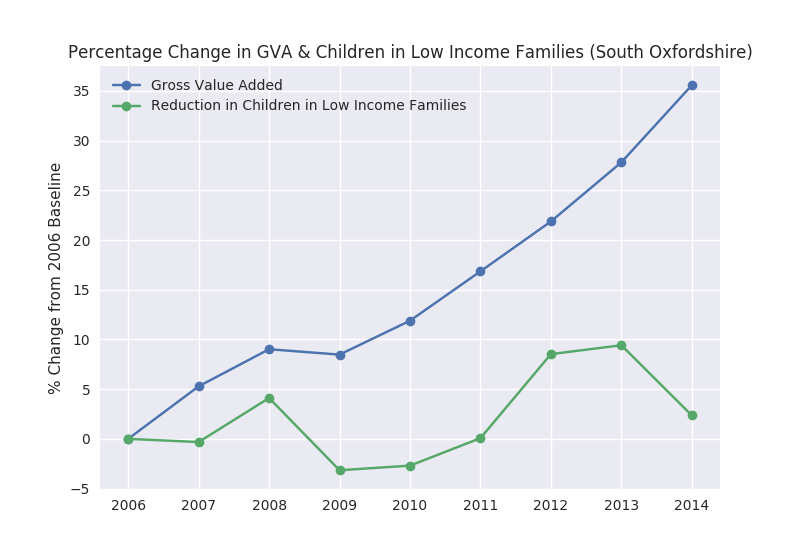

In [117]:
plt.figure()
plt.plot(df['GVA % Change'], '-o', df['Child LIF % Change'], '-o');
plt.gca().set_title('Percentage Change in GVA & Children in Low Income Families (South Oxfordshire)');
plt.gca().set_ylabel('% Change from 2006 Baseline');
plt.gca().legend(['Gross Value Added','Reduction in Children in Low Income Families']);